In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep  2 2021, 17:58:46) 
[Clang 11.1.0 ]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[ OK ] xgboost version 1.3.3 is installed.
[ OK ] shap version 0.39.0 is installed.


# World of Warcraft Battleground Data Analysis

World of Warcraft is a MMORPG game that was created by Blizzard Entertainment. The game contained many content. One of the most popular game mode is Battleground. This game mode assembles 10 to 40 people (Depend on the map) from each faction (Alliance/Horde) and compete against each other. 

In this project, we will be analyzing a World of Warcraft Battleground dataset that we found on Kaggle. The link to the dataset is linked below. 

Our final goal for this project is to predict win or lose for a given player. 


https://www.kaggle.com/cblesa/world-of-warcraft-battlegrounds

## EDA

##### Import packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [54]:
df = pd.read_csv('../data/wowbgs.csv')
df

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,WG,WG35,Alliance,Druid,18,1,52,123000,49511,615,1.0,NaN,dps,NaN
3722,WG,WG35,Alliance,Monk,0,4,33,13087,9057,555,1.0,NaN,dps,NaN
3723,WG,WG35,Horde,Hunter,2,5,28,57365,6837,193,NaN,1.0,dps,NaN
3724,WG,WG35,Alliance,Death Knight,2,5,41,44997,40934,581,1.0,NaN,dps,NaN


In [55]:
# Get the shape of the data
df.shape

(3726, 14)

#### Column analysis

First of all, I would like to take a look at our target varible. Notice that we have a win column filled with 1 when a player won and lose column filled with a 1 if a play lose. Will will take win as our target varible. I will also check these two columns and make sure we are getting the same information from these two columns.

1.0    1889
Name: Win, dtype: int64


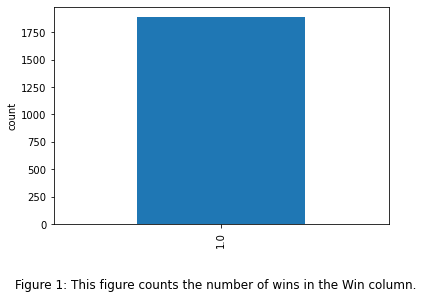

In [56]:
print(df['Win'].value_counts())
df['Win'].value_counts().plot.bar()
txt = '''Figure 1: This figure counts the number of wins in the Win column.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('count')
plt.show()

1.0    1837
Name: Lose, dtype: int64


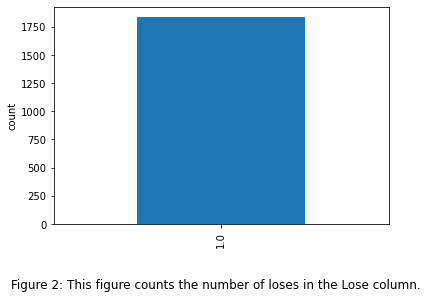

In [57]:
print(df['Lose'].value_counts())
df['Lose'].value_counts().plot.bar()
txt = '''Figure 2: This figure counts the number of loses in the Lose column.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('count')
plt.show()

In [58]:
# We are checking if these two columns added together have the same shape as the dataframe

df.shape[0] == df['Win'].value_counts()[1] + df['Lose'].value_counts()[1]

True

In [59]:
# From other basic analysis above and from the data's author's description, we know that there are only win or lose for each game.
# We will combine them together to form a new 'Win' column as our target variable
# We will also drop 'Code' since the author did not give a clear description and neither used it for analysis
df.drop(columns = ['Code', 'Lose'], inplace = True)
df['Win'] = df['Win'].replace(np.nan,0)
print(df.shape)
print(df.head())

(3726, 12)
  Battleground   Faction         Class  KB  D  HK     DD     HD  Honor  Win  \
0           WG     Horde        Hunter   1  3  14  48155   6641    532  1.0   
1           WG     Horde  Death Knight   1  3  12  27025   7106    377  1.0   
2           WG  Alliance       Paladin   0  1  19    824  93879    252  0.0   
3           WG  Alliance       Paladin   1  2  25   7046  98599    274  0.0   
4           WG  Alliance         Rogue   2  3  23  65483  19629    268  0.0   

    Rol  BE  
0   dps NaN  
1   dps NaN  
2  heal NaN  
3  heal NaN  
4   dps NaN  


Win is our target variable for this project.

count    3726.000000
mean        0.506978
std         0.500018
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Win, dtype: float64


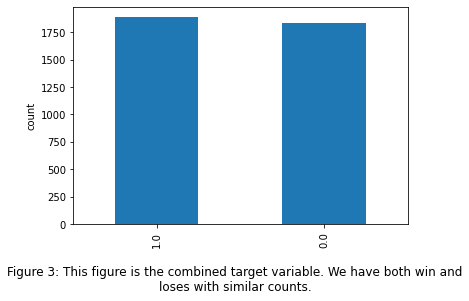

In [60]:
print(df['Win'].describe())
df['Win'].value_counts().plot.bar()
txt = '''Figure 3: This figure is the combined target variable. We have both win and
loses with similar counts.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('count')
plt.show()

count     3726
unique       9
top         WG
freq       687
Name: Battleground, dtype: object


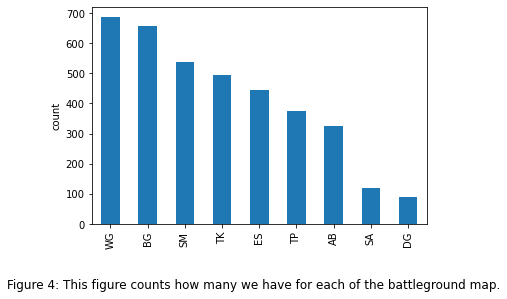

Win                0.0       1.0
Battleground                    
AB            0.493865  0.506135
BG            0.484018  0.515982
DG            0.494382  0.505618
ES            0.494357  0.505643
SA            0.508475  0.491525
SM            0.498134  0.501866
TK            0.493927  0.506073
TP            0.494681  0.505319
WG            0.491994  0.508006


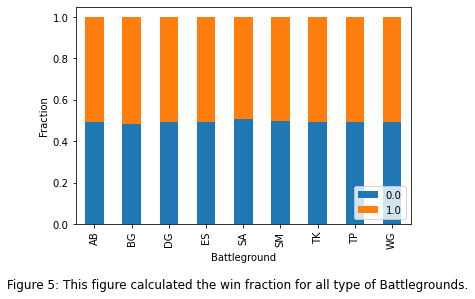

In [62]:
print(df['Battleground'].describe())
df['Battleground'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 4: This figure counts how many we have for each of the battleground map.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['Battleground', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction')
plt.legend(loc=4)
txt = '''Figure 5: This figure calculated the win fraction for all type of Battlegrounds.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/bg_win.png", bbox_inches = 'tight')
plt.show()

This column gives us the distribution of different battleground. 

count      3726
unique        2
top       Horde
freq       1875
Name: Faction, dtype: object


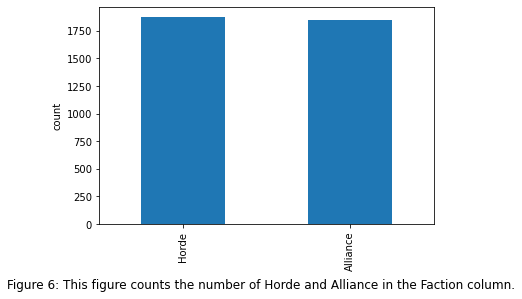

In [63]:
print(df['Faction'].describe())
df['Faction'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 6: This figure counts the number of Horde and Alliance in the Faction column.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

Win            0.0       1.0
Faction                     
Alliance  0.651540  0.348460
Horde     0.336533  0.663467


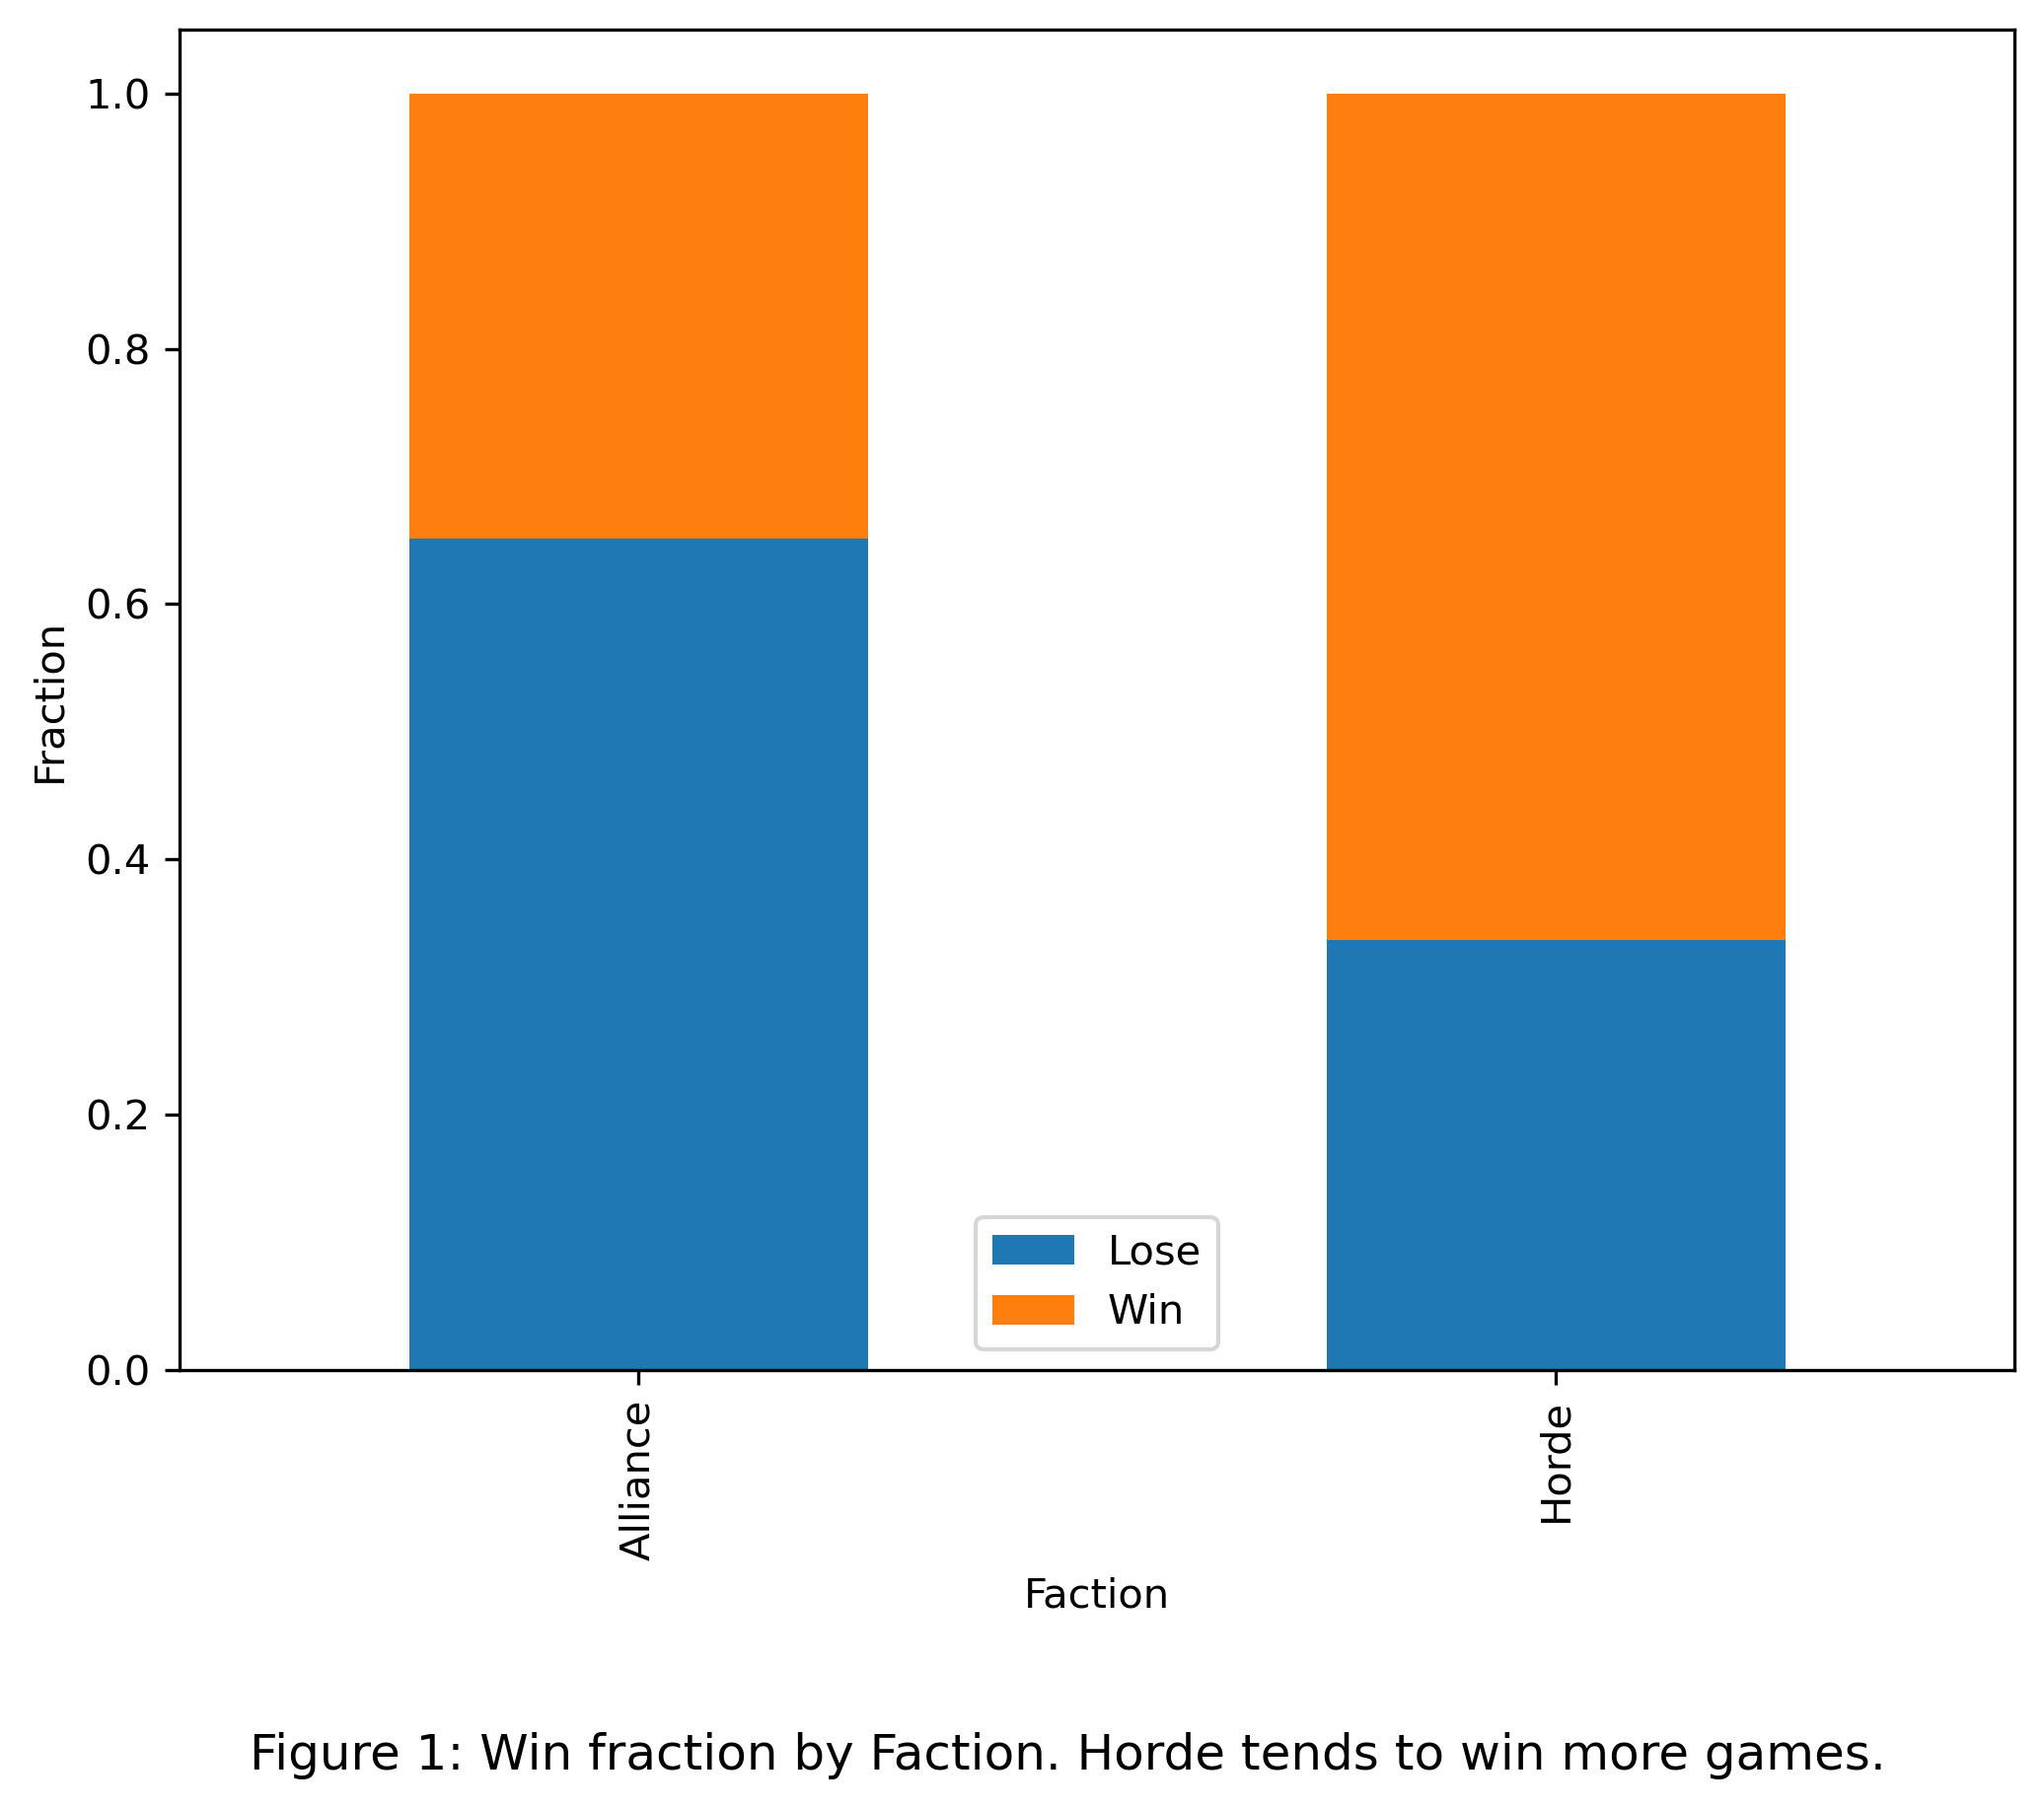

In [64]:
count_matrix = df.groupby(['Faction', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
txt = '''Figure 1: Win fraction by Faction. Horde tends to win more games.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('Fraction')
l = plt.legend()
l.get_texts()[0].set_text('Lose')
l.get_texts()[1].set_text('Win')
plt.gcf().set_size_inches(8, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/faction_win.png", bbox_inches = 'tight')
plt.show()

count       3726
unique        12
top       Shaman
freq         396
Name: Class, dtype: object


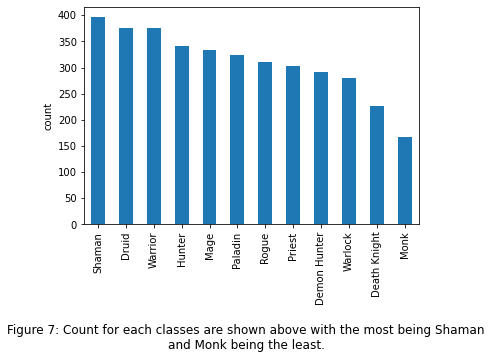

Win                0.0       1.0
Class                           
Death Knight  0.444934  0.555066
Demon Hunter  0.479452  0.520548
Druid         0.518617  0.481383
Hunter        0.571848  0.428152
Mage          0.532934  0.467066
Monk          0.497006  0.502994
Paladin       0.490741  0.509259
Priest        0.485149  0.514851
Rogue         0.451613  0.548387
Shaman        0.424242  0.575758
Warlock       0.500000  0.500000
Warrior       0.507979  0.492021


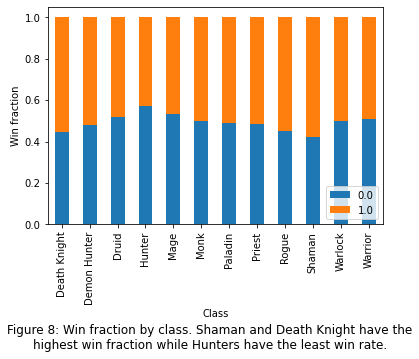

In [72]:
print(df['Class'].describe())
df['Class'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 7: Count for each classes are shown above with the most being Shaman
and Monk being the least.'''
plt.figtext(0.5, -0.3, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['Class', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Win fraction')
plt.legend(loc=4)
txt = '''Figure 8: Win fraction by class. Shaman and Death Knight have the
highest win fraction while Hunters have the least win rate.'''
plt.figtext(0.5, -0.3, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/class_win.png", bbox_inches = 'tight')
plt.show()

count    3726.000000
mean        3.015835
std         3.141498
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        23.000000
Name: KB, dtype: float64


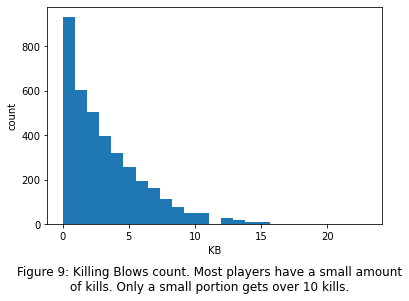

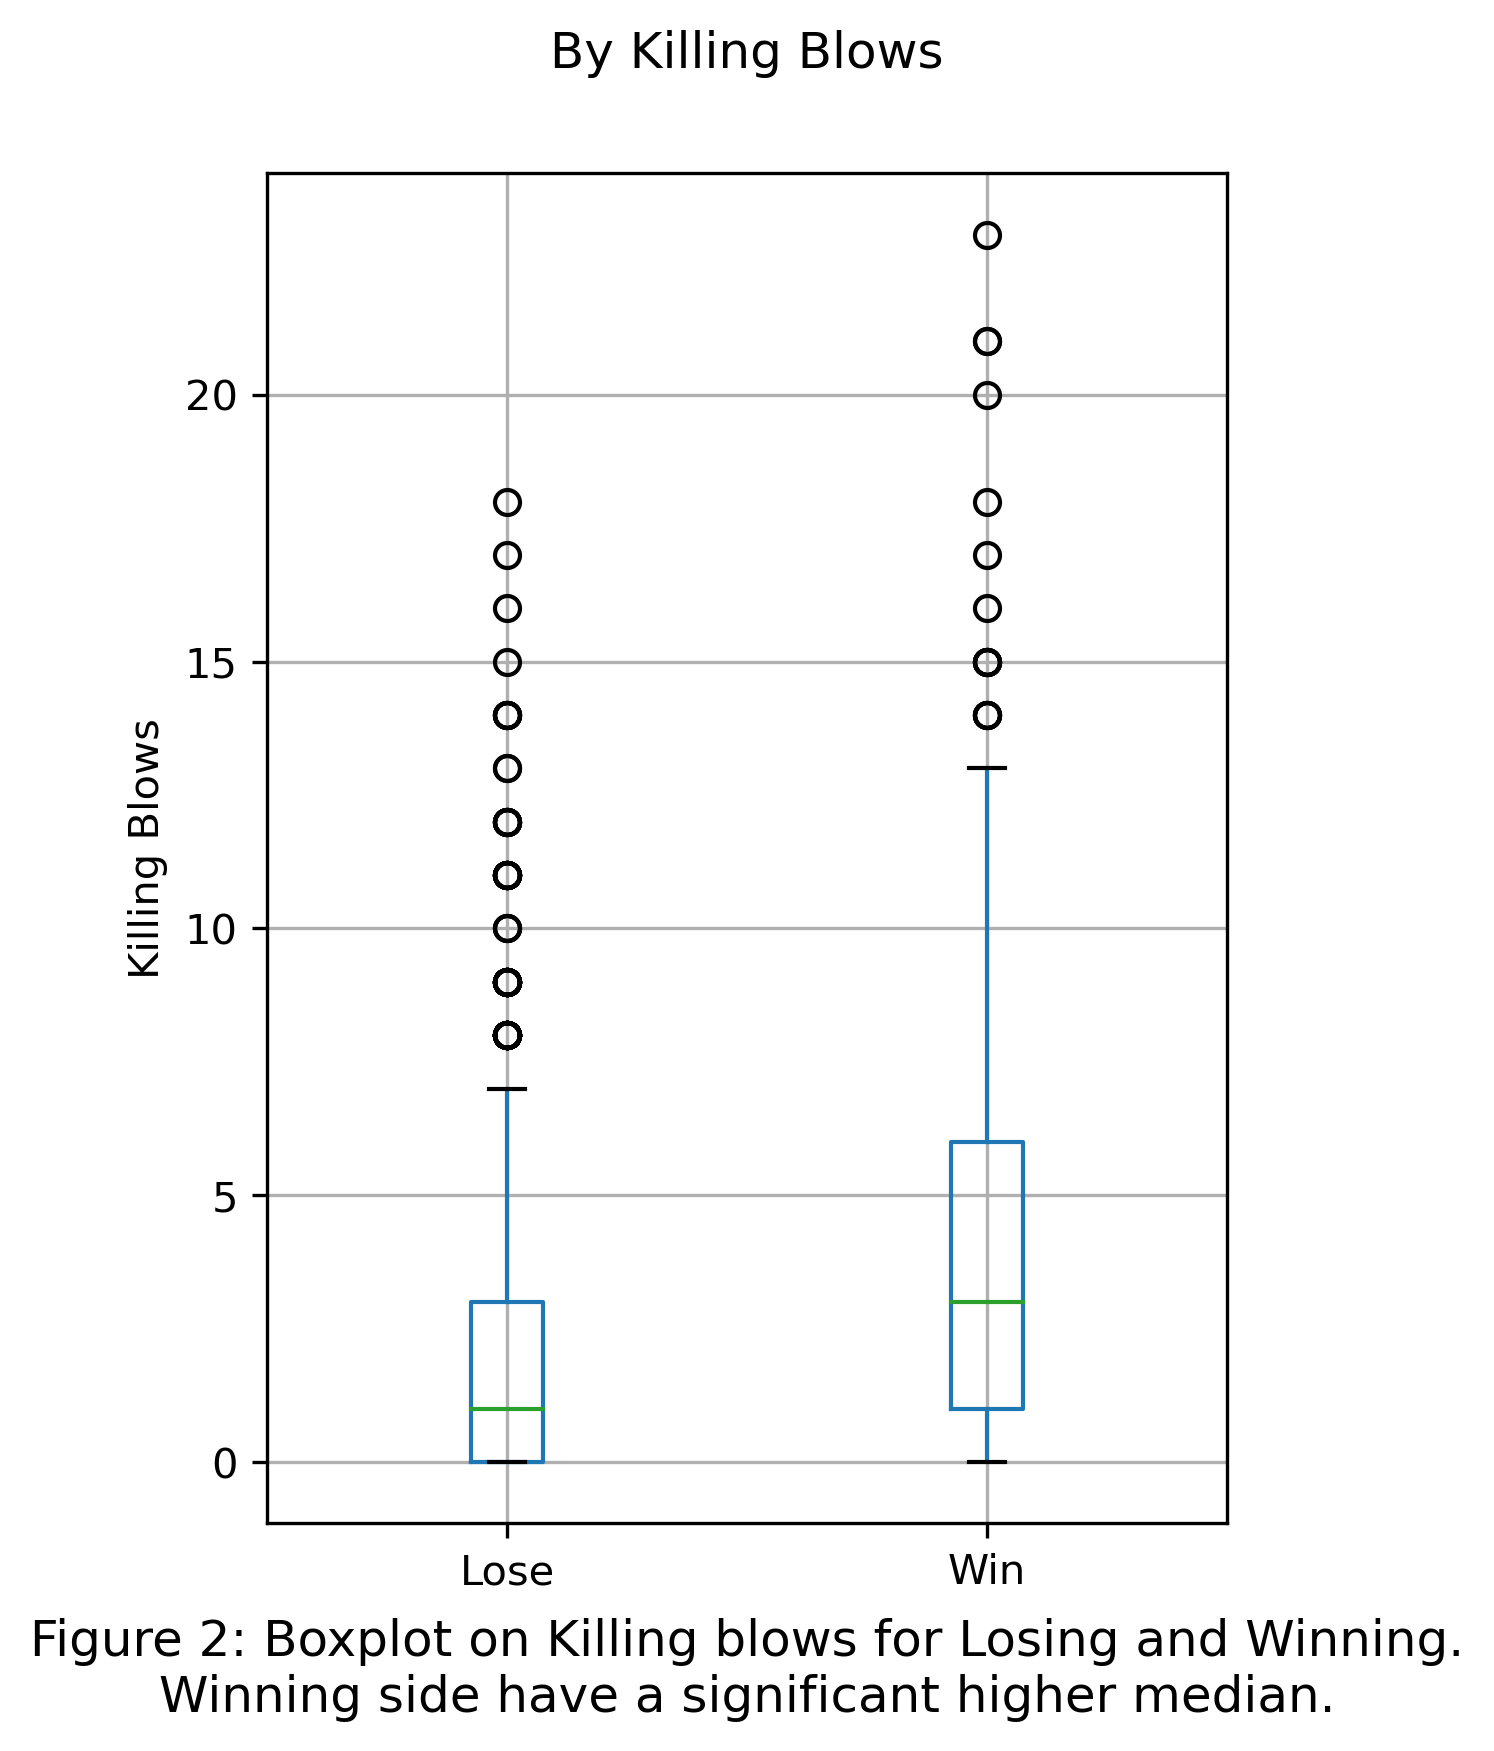

In [93]:
print(df['KB'].describe())
df['KB'].plot.hist(bins = 25)
plt.xlabel('KB')
plt.ylabel('count')
txt = '''Figure 9: Killing Blows count. Most players have a small amount
of kills. Only a small portion gets over 10 kills.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'KB': df['KB'], 'Win': df['Win']})
temp_df.boxplot(by='Win')

txt = '''Figure 2: Boxplot on Killing blows for Losing and Winning.
Winning side have a significant higher median.'''
plt.xticks([1,2], ["Lose", "Win"])
plt.title('')
plt.xlabel('')
plt.ylabel('Killing Blows')
plt.suptitle('By Killing Blows')
plt.figtext(0.5, 0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.gcf().set_size_inches(4, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/KB_box.png", bbox_inches = 'tight')
plt.show()

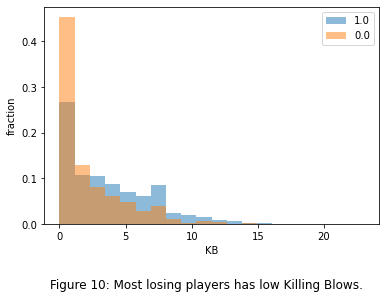

In [82]:
categories = df['Win'].unique()
bin_range = (df['KB'].min(),df['KB'].max())

for c in categories:
    plt.hist(df[df['Win']==c]['KB'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('KB')
txt = '''Figure 10: Most losing players has low Killing Blows.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/KB_win.png", bbox_inches = 'tight')
plt.show()

count    3726.000000
mean        3.025497
std         2.209958
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: D, dtype: float64


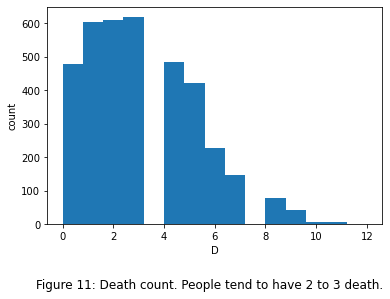

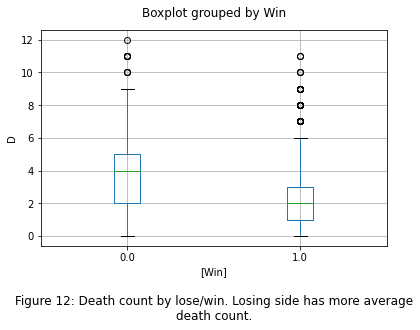

In [87]:
print(df['D'].describe())
df['D'].plot.hist(bins = 15)
plt.xlabel('D')
plt.ylabel('count')
txt = '''Figure 11: Death count. People tend to have 2 to 3 death.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'D': df['D'], 'Win': df['Win']})
temp_df.boxplot(by='Win')
plt.title('')
plt.ylabel('D')
txt = '''Figure 12: Death count by lose/win. Losing side has more average
death count.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count    3726.000000
mean       26.420558
std        15.989997
min         0.000000
25%        14.000000
50%        25.000000
75%        38.000000
max        95.000000
Name: HK, dtype: float64


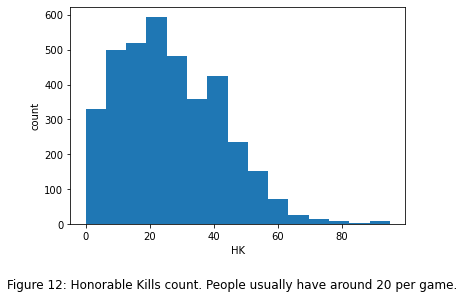

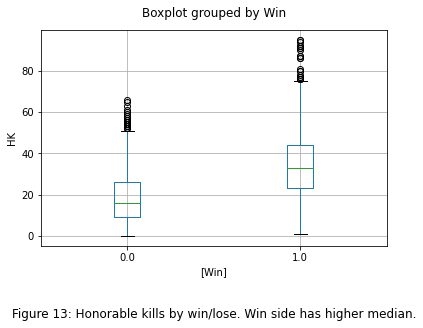

In [94]:
print(df['HK'].describe())
df['HK'].plot.hist(bins = 15)
plt.xlabel('HK')
plt.ylabel('count')
txt = '''Figure 12: Honorable Kills count. People usually have around 20 per game.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'HK': df['HK'], 'Win': df['Win']})
temp_df.boxplot(by='Win')
plt.title('')
plt.ylabel('HK')
txt = '''Figure 13: Honorable kills by win/lose. Win side has higher median.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count      3726.000000
mean      41215.037842
std       33193.413617
min           0.000000
25%       15490.500000
50%       34107.500000
75%       58958.000000
max      246000.000000
Name: DD, dtype: float64


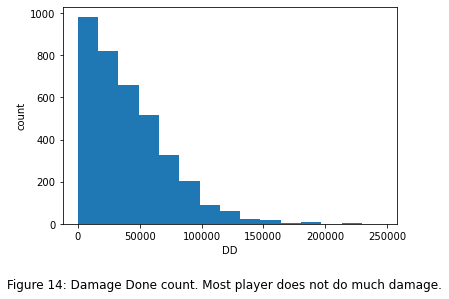

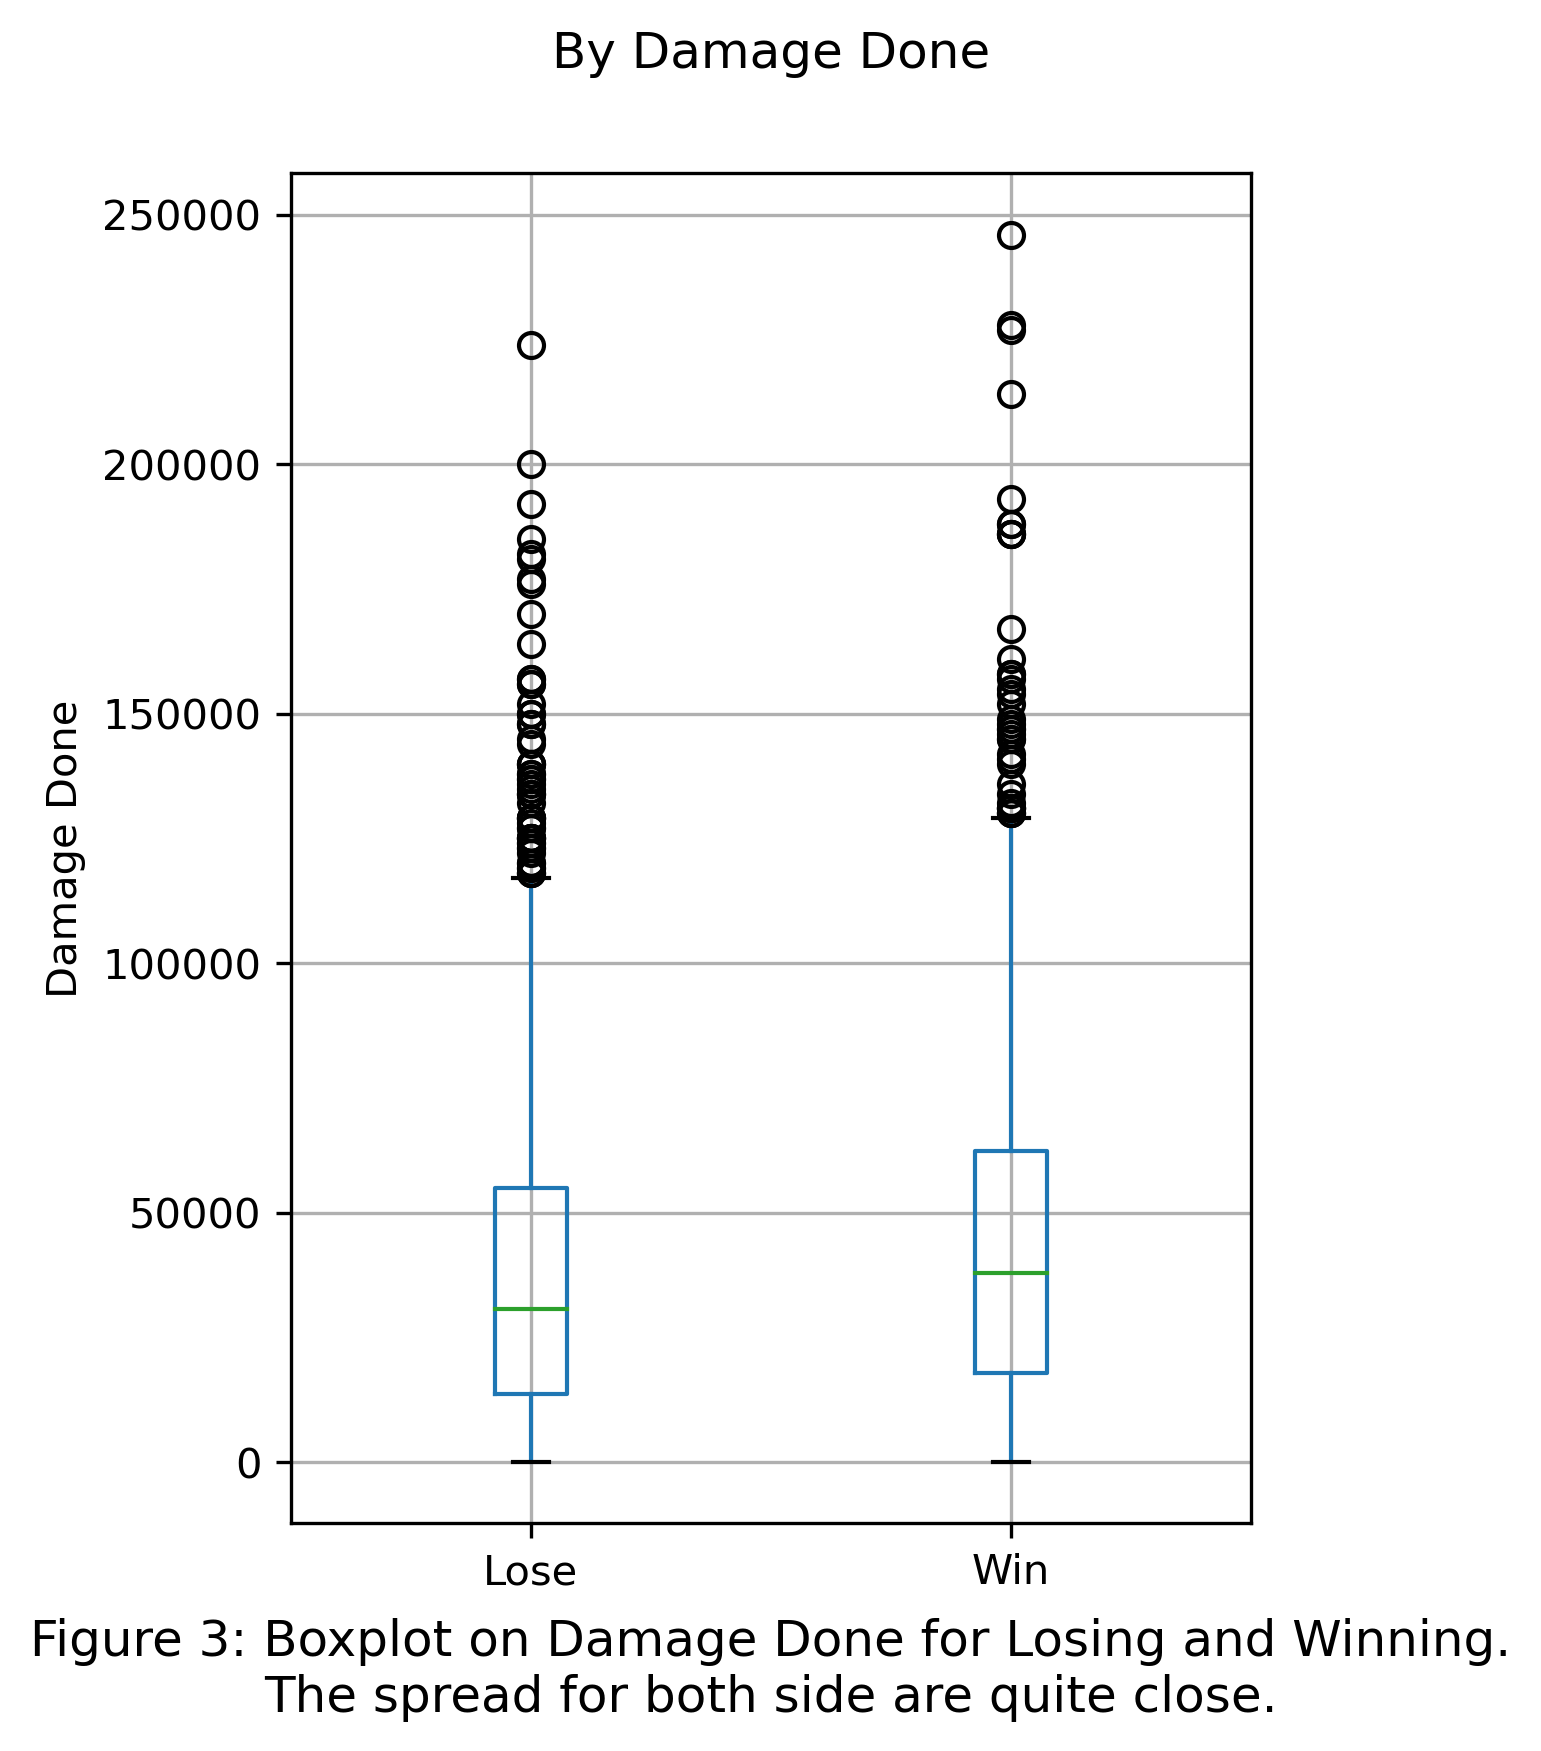

In [95]:
print(df['DD'].describe())
df['DD'].plot.hist(bins = 15)
plt.xlabel('DD')
plt.ylabel('count')
txt = '''Figure 14: Damage Done count. Most player does not do much damage.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'DD': df['DD'], 'Win': df['Win']})
temp_df.boxplot(by='Win')

txt = '''Figure 3: Boxplot on Damage Done for Losing and Winning.
The spread for both side are quite close.'''
plt.xticks([1,2], ["Lose", "Win"])
plt.title('')
plt.xlabel('')
plt.ylabel('Damage Done')
plt.suptitle('By Damage Done')
plt.figtext(0.5, 0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.gcf().set_size_inches(4, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/DD_box.png", bbox_inches = 'tight')
plt.show()

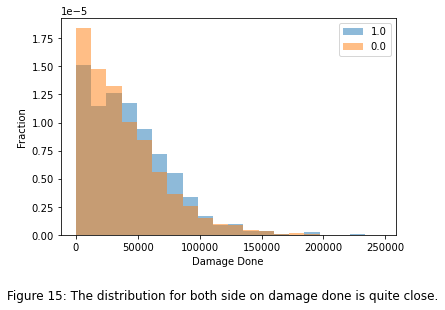

In [96]:
categories = df['Win'].unique()
bin_range = (df['DD'].min(),df['DD'].max())

for c in categories:
    plt.hist(df[df['Win']==c]['DD'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Damage Done')
txt = '''Figure 15: The distribution for both side on damage done is quite close.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/DD_win.png", bbox_inches = 'tight')
plt.show()

count      3726.000000
mean      26426.688674
std       37583.736064
min           0.000000
25%        5919.250000
50%       12070.500000
75%       26695.500000
max      325000.000000
Name: HD, dtype: float64


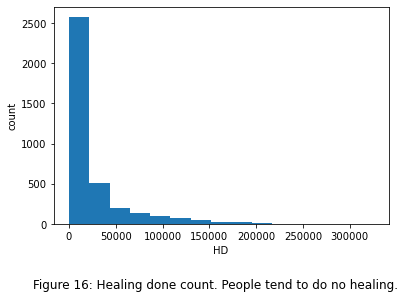

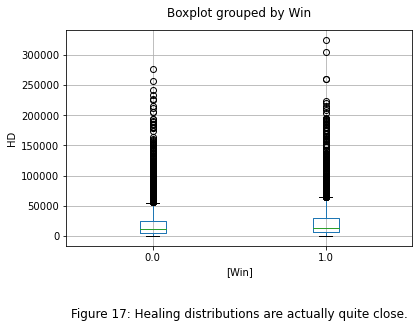

In [97]:
print(df['HD'].describe())
df['HD'].plot.hist(bins = 15)
plt.xlabel('HD')
plt.ylabel('count')
txt = '''Figure 16: Healing done count. People tend to do no healing.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'HD': df['HD'], 'Win': df['Win']})
temp_df.boxplot(by='Win')
plt.title('')
plt.ylabel('HD')
txt = '''Figure 17: Healing distributions are actually quite close.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count    3726.000000
mean      402.816694
std       205.689061
min        25.000000
25%       234.000000
50%       371.500000
75%       529.000000
max      1174.000000
Name: Honor, dtype: float64


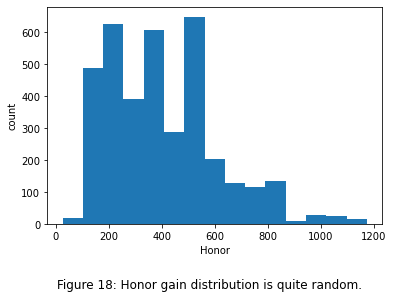

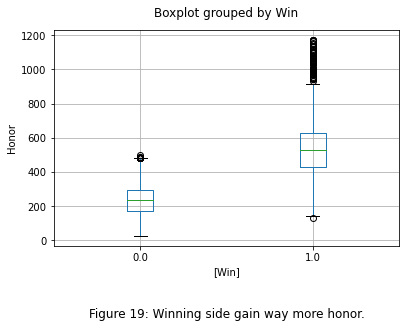

In [98]:
print(df['Honor'].describe())
df['Honor'].plot.hist(bins = 15)
plt.xlabel('Honor')
plt.ylabel('count')
txt = '''Figure 18: Honor gain distribution is quite random.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'Honor': df['Honor'], 'Win': df['Win']})
temp_df.boxplot(by='Win')
plt.title('')
plt.ylabel('Honor')
txt = '''Figure 19: Winning side gain way more honor.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count     3726
unique       2
top        dps
freq      3000
Name: Rol, dtype: object


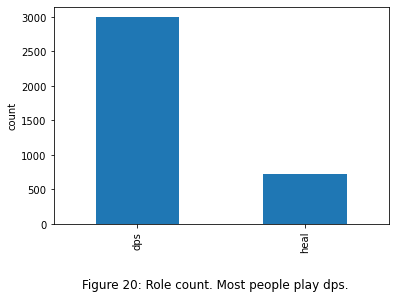

Win        0.0       1.0
Rol                     
dps   0.497667  0.502333
heal  0.473829  0.526171


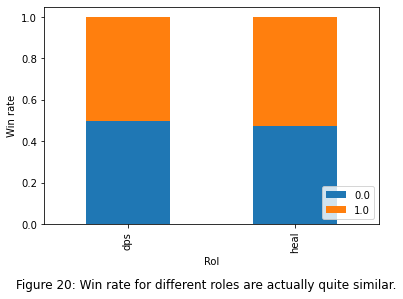

In [99]:
print(df['Rol'].describe())
df['Rol'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 20: Role count. Most people play dps.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['Rol', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Win rate')
plt.legend(loc=4)
txt = '''Figure 20: Win rate for different roles are actually quite similar.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count    529.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: BE, dtype: float64


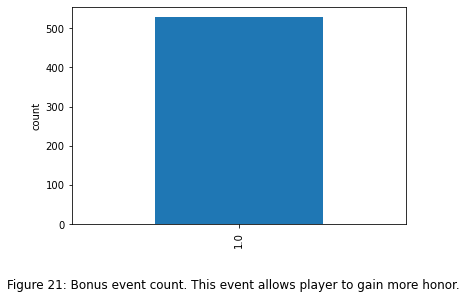

Win       0.0       1.0
BE                     
1.0  0.497164  0.502836


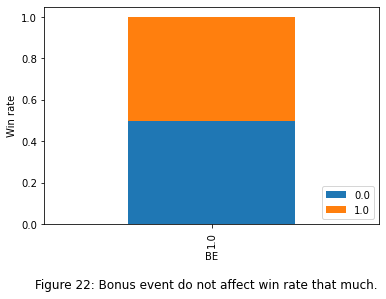

In [100]:
print(df['BE'].describe())
df['BE'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 21: Bonus event count. This event allows player to gain more honor.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['BE', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Win rate')
plt.legend(loc=4)
txt = '''Figure 22: Bonus event do not affect win rate that much.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

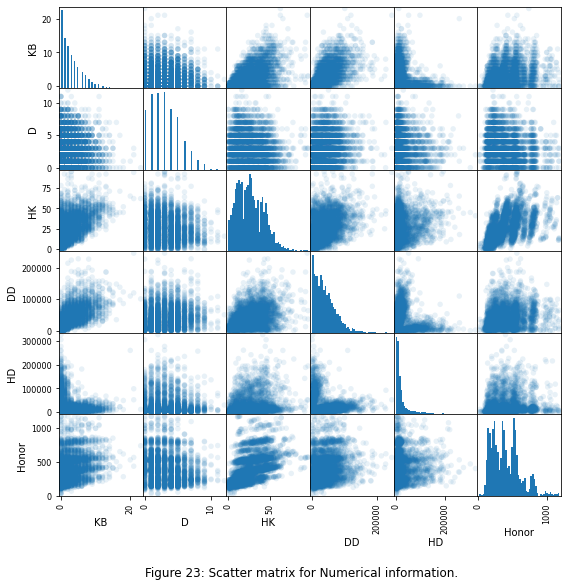

In [102]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)

txt = '''Figure 23: Scatter matrix for Numerical information.'''
plt.figtext(0.5, 0, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

In [103]:
corrMatrix = df.corr()
print(corrMatrix)

             KB         D        HK        DD        HD     Honor       Win  \
KB     1.000000 -0.075229  0.497499  0.619745 -0.226175  0.275839  0.248338   
D     -0.075229  1.000000 -0.135933  0.133150 -0.016778 -0.206369 -0.344289   
HK     0.497499 -0.135933  1.000000  0.355462  0.192361  0.524945  0.478220   
DD     0.619745  0.133150  0.355462  1.000000 -0.208453  0.191224  0.073264   
HD    -0.226175 -0.016778  0.192361 -0.208453  1.000000  0.097894  0.049371   
Honor  0.275839 -0.206369  0.524945  0.191224  0.097894  1.000000  0.756700   
Win    0.248338 -0.344289  0.478220  0.073264  0.049371  0.756700  1.000000   
BE          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       BE  
KB    NaN  
D     NaN  
HK    NaN  
DD    NaN  
HD    NaN  
Honor NaN  
Win   NaN  
BE    NaN  


In [104]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [105]:
import seaborn as sns

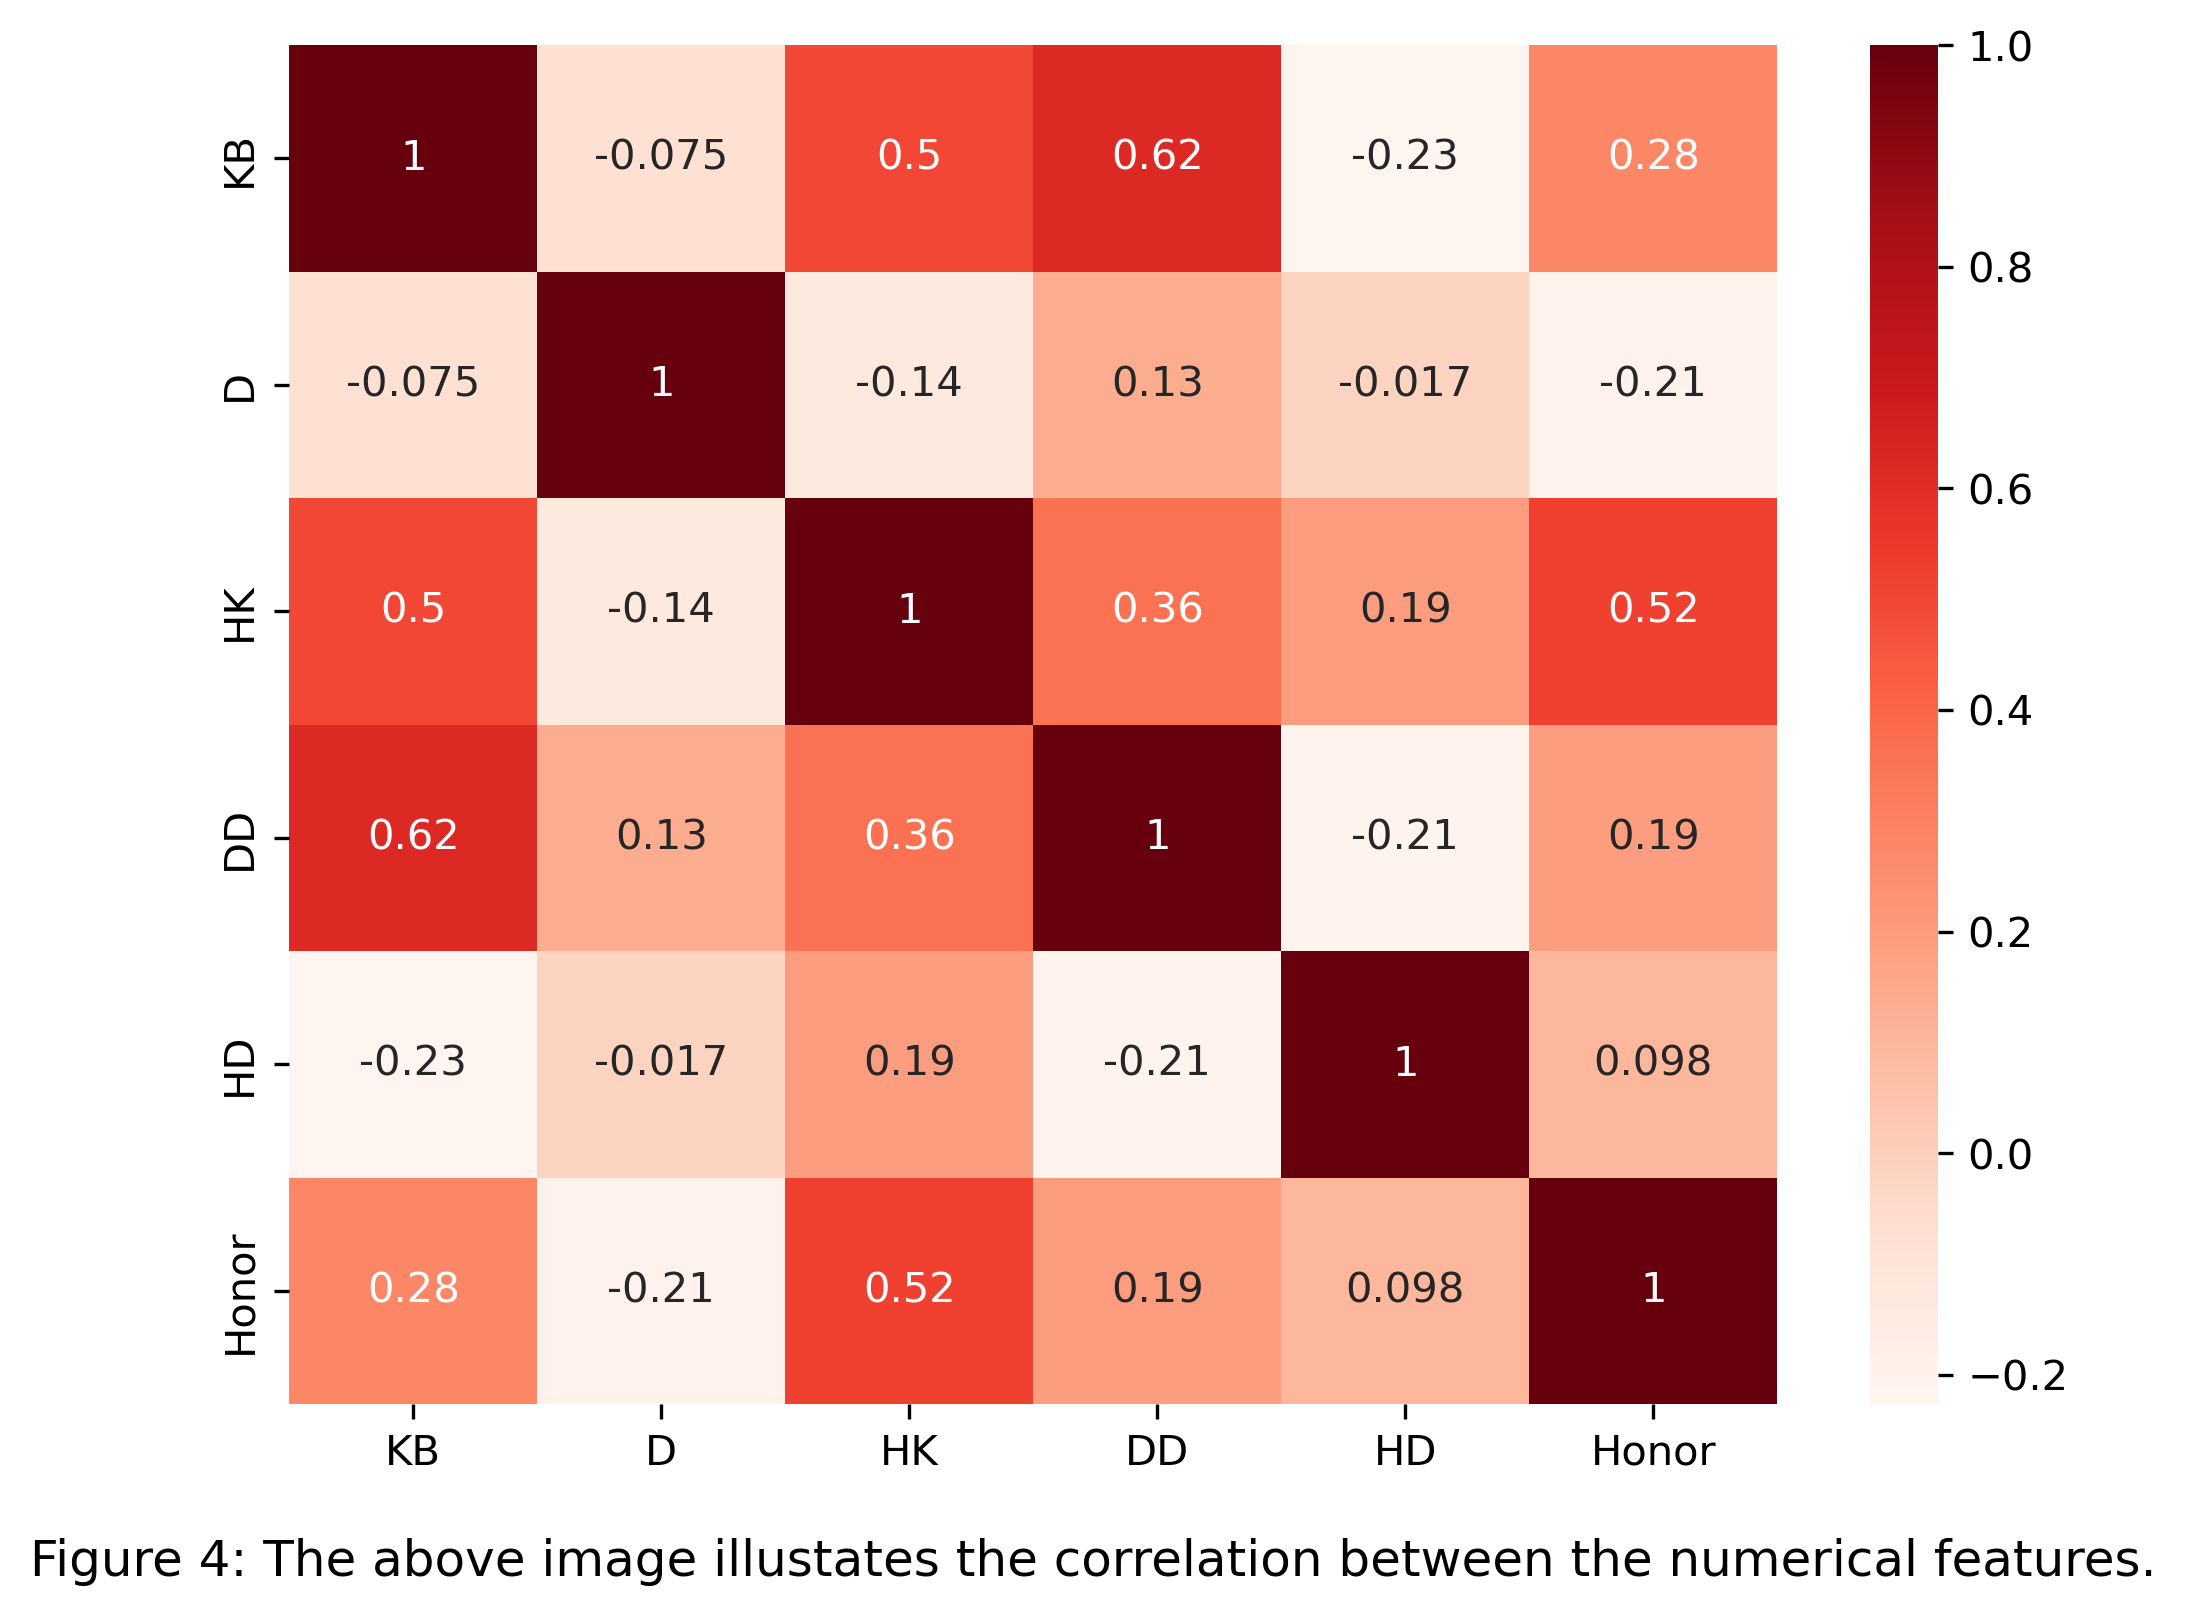

In [106]:
sns.heatmap(corrMatrix.iloc[0:6, 0:6], cmap = 'Reds', annot = True)
txt = '''Figure 4: The above image illustates the correlation between the numerical features.'''
plt.figtext(0.46, 0.03, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.gcf().set_size_inches(8, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/feature_corr.png", bbox_inches = 'tight')
plt.show()

## Data preprocessing

Our data was collected from many players from many games. The data does not have a group structure nor a time factor involved. Therefore, the data is IID. We will use the basic train-test-split and KFOLD CV.

In [107]:
from sklearn.model_selection import train_test_split, KFold

y = df['Win']
X = df.loc[:, df.columns != 'Win']
print(y)
print(X.head())

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3721    1.0
3722    1.0
3723    0.0
3724    1.0
3725    1.0
Name: Win, Length: 3726, dtype: float64
  Battleground   Faction         Class  KB  D  HK     DD     HD  Honor   Rol  \
0           WG     Horde        Hunter   1  3  14  48155   6641    532   dps   
1           WG     Horde  Death Knight   1  3  12  27025   7106    377   dps   
2           WG  Alliance       Paladin   0  1  19    824  93879    252  heal   
3           WG  Alliance       Paladin   1  2  25   7046  98599    274  heal   
4           WG  Alliance         Rogue   2  3  23  65483  19629    268   dps   

   BE  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  


In [108]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [109]:
df

,Battleground,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Rol,BE
0,WG,Horde,Hunter,1,3,14,48155,6641,532,1.0,dps,NaN
1,WG,Horde,Death Knight,1,3,12,27025,7106,377,1.0,dps,NaN
2,WG,Alliance,Paladin,0,1,19,824,93879,252,0.0,heal,NaN
3,WG,Alliance,Paladin,1,2,25,7046,98599,274,0.0,heal,NaN
4,WG,Alliance,Rogue,2,3,23,65483,19629,268,0.0,dps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3721,WG,Alliance,Druid,18,1,52,123000,49511,615,1.0,dps,NaN
3722,WG,Alliance,Monk,0,4,33,13087,9057,555,1.0,dps,NaN
3723,WG,Horde,Hunter,2,5,28,57365,6837,193,0.0,dps,NaN
3724,WG,Alliance,Death Knight,2,5,41,44997,40934,581,1.0,dps,NaN


In [110]:
# collect the various features
cat_ftrs = ['Battleground', 'Faction', 'Class', 'Rol', 'BE']
num_ftrs = ['KB', 'D', 'HK', 'DD', 'HD', 'HD', 'Honor']

In [111]:
# one-hot encoder
# Replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0.0)),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

In [112]:
random_state = 123

# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
#print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# Array to capture splitted data
data_after_split = []

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)

temp_splitted = {'train':[], 'cv':[], 'test':[]}
for train_index, val_index in kf.split(X_other,y_other):
    temp_splitted = {'train':[], 'cv':[], 'test':[]}
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    
    # Transform data
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    temp_splitted['train'].append([X_train_prep, y_train])
    temp_splitted['cv'].append([X_val_prep, y_val])
    temp_splitted['test'].append([X_test_prep, y_test])  
    data_after_split.append(temp_splitted)
    print('   training set:',X_train_prep.shape, y_train.shape) 
    print('   validation set:',X_val_prep.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    print(X_val_prep)

test set: (746, 11) (746,)
   training set: (2384, 34) (2384,)
   validation set: (596, 34) (596,)
[[ 0.00881582  0.42522478  0.97934705 ...  0.          1.
   0.        ]
 [-0.9464989   0.87338388  0.29217423 ...  0.          0.
   1.        ]
 [-0.30962242 -0.02293432 -0.9572309  ...  0.          1.
   0.        ]
 ...
 [ 0.6456923   0.42522478  0.29217423 ...  0.          1.
   0.        ]
 [ 0.6456923  -0.91925251 -0.76982013 ...  0.          1.
   0.        ]
 [-0.30962242  0.87338388 -0.14511757 ...  0.          1.
   0.        ]]
   training set: (2384, 34) (2384,)
   validation set: (596, 34) (596,)
[[-0.31871198 -0.02004038 -0.66112824 ...  0.          1.
   0.        ]
 [ 1.89739866 -1.37219863  2.19002465 ...  0.          1.
   0.        ]
 [ 2.53057313 -0.92147921  1.57020881 ...  0.          1.
   0.        ]
 ...
 [-0.31871198 -0.4707598   0.88841138 ...  0.          1.
   0.        ]
 [ 0.31446249 -1.37219863 -0.04131239 ...  0.          1.
   0.        ]
 [-0.63529921  